In [3]:
#  Auto-Sort Images
import os
import shutil

# Path where your .tiff images are stored
dataset_folder = "jaffe_dataset"  # change this if needed

# Map emotion codes to folder names
emotion_map = {
    'AN': 'angry',
    'DI': 'disgust',
    'FE': 'fear',
    'HA': 'happy',
    'NE': 'neutral',
    'SA': 'sad',
    'SU': 'surprise'
}

# Create 7 folders if not exist
for emotion in emotion_map.values():
    os.makedirs(os.path.join(dataset_folder, emotion), exist_ok=True)

# Move each image to its corresponding folder
for filename in os.listdir(dataset_folder):
    if filename.endswith('.tiff'):
        emotion_code = filename.split('.')[1][:2]  # Get 'AN', 'HA', etc.
        folder = emotion_map.get(emotion_code)
        if folder:
            src = os.path.join(dataset_folder, filename)
            dst = os.path.join(dataset_folder, folder, filename)
            shutil.move(src, dst)

print("✅ All images sorted into 7 folders.")


✅ All images sorted into 7 folders.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (48, 48)

# Normalize and split data
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values (0 to 1)
    validation_split=0.2  # Use 20% of data for validation
)

train_data = datagen.flow_from_directory(
    'jaffe_dataset',       # Folder where emotion folders are stored
    target_size=img_size,
    color_mode='grayscale',
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'jaffe_dataset',
    target_size=img_size,
    color_mode='grayscale',
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 172 images belonging to 7 classes.
Found 41 images belonging to 7 classes.


C:\Users\syeds\.conda\envs\tf310\lib\site-packages\keras\preprocessing\image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


In [6]:
# Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 output classes
])


In [7]:
# Build CNN Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)


Epoch 1/20
22/22 [==============================] - 6s 206ms/step - loss: 1.9758 - accuracy: 0.1105 - val_loss: 1.9428 - val_accuracy: 0.1463
Epoch 2/20
22/22 [==============================] - 1s 48ms/step - loss: 1.9414 - accuracy: 0.1628 - val_loss: 1.9336 - val_accuracy: 0.2439
Epoch 3/20
22/22 [==============================] - 1s 47ms/step - loss: 1.9355 - accuracy: 0.2209 - val_loss: 1.9213 - val_accuracy: 0.2439
Epoch 4/20
22/22 [==============================] - 1s 46ms/step - loss: 1.8973 - accuracy: 0.2151 - val_loss: 1.9007 - val_accuracy: 0.1951
Epoch 5/20
22/22 [==============================] - 1s 50ms/step - loss: 1.7992 - accuracy: 0.2733 - val_loss: 1.8400 - val_accuracy: 0.2439
Epoch 6/20
22/22 [==============================] - 1s 48ms/step - loss: 1.6995 - accuracy: 0.3488 - val_loss: 1.7711 - val_accuracy: 0.3171
Epoch 7/20
22/22 [==============================] - 1s 47ms/step - loss: 1.6492 - accuracy: 0.3721 - val_loss: 1.7720 - val_accuracy: 0.1707
Epoch 8/20
2

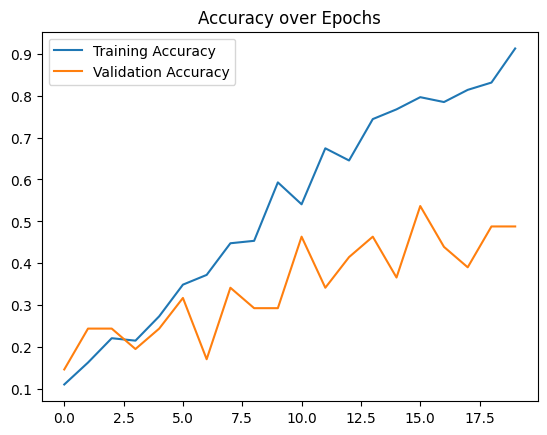

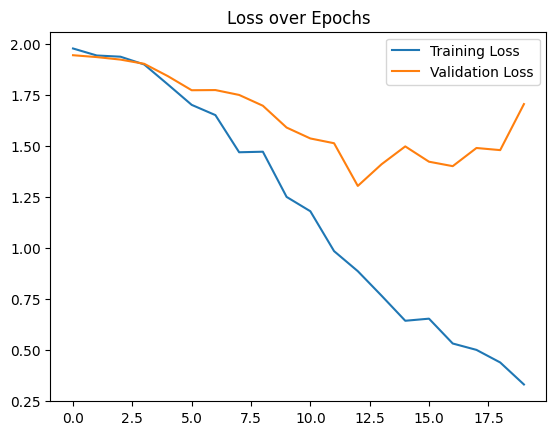

In [8]:
#Plot Accuracy and Loss
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [9]:
#Save the Trained Model
model.save("emotion_detector_jaffe.h5")


In [11]:
!pip install opencv-python



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.8/39.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/39.5 MB 4.1 MB/s eta 0:00:10
   -- ------------------------------------- 2.9/39.5 MB 3.4 MB/s eta 0:00:11
   --- ------------------------------------ 3.7/39.5 MB 3.5 MB/s eta 0:00:11
   ---- ----------------------------------- 4.5/39.5 MB 3.6 MB/s eta 0:00:10
   ----- ---------------------------------- 5.2/39.5 MB 3.5 MB/s eta 0:00:10
   ------ --------------------------------- 6.0/39.5 MB 3.5 MB/s eta 0:00:10
   ------ --------------------------------- 6.8/39.5 MB 3.6 MB/s eta 0:00:10
   ------- -------------------------------- 7.6/39.5 MB 3.5 MB/s eta 0:00:10
   -------- ------------------------------- 8.1/39.5 MB 3.4 MB/s eta 0:00:10
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import cv2
print("OpenCV version:", cv2.__version__)


OpenCV version: 4.11.0


In [1]:
import numpy as np
import tensorflow as tf
import cv2

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)


NumPy version: 1.24.3
TensorFlow version: 2.13.0
OpenCV version: 4.11.0


In [4]:
#Testing 
# Import required libraries
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load your trained model
model = load_model("emotion_detector_jaffe.h5")

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load the test image (change filename if needed)
img = cv2.imread("YM.HA3.54.tiff", cv2.IMREAD_GRAYSCALE)

# Resize and normalize the image
img_resized = cv2.resize(img, (48, 48))
img_normalized = img_resized / 255.0

# Reshape the image for model input
img_input = np.reshape(img_normalized, (1, 48, 48, 1))

# Predict the emotion
prediction = model.predict(img_input)
predicted_label = emotion_labels[np.argmax(prediction)]

# Show result
print("✅ Predicted Emotion:", predicted_label)


1/1 [==============================] - 0s 468ms/step
✅ Predicted Emotion: happy


1/1 [==============================] - 0s 49ms/step
✅ Predicted Emotion: sad


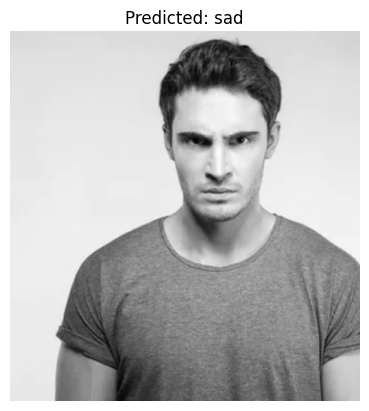

In [9]:
# Load  image
img = cv2.imread("sample_image.png")  # change the filename if needed

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to 48x48
img_resized = cv2.resize(img_gray, (48, 48))

# Normalize and reshape
img_normalized = img_resized / 255.0
img_input = np.reshape(img_normalized, (1, 48, 48, 1))

# Predict
prediction = model.predict(img_input)
predicted_label = emotion_labels[np.argmax(prediction)]

# Show result
print("✅ Predicted Emotion:", predicted_label)

plt.imshow(img_gray, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
